In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [79]:
# Load the dataset
file_path = 'training_data.csv'
data = pd.read_csv(file_path)
data['increase_stock_binary'] = data['increase_stock'].apply(lambda x: 1 if x == 'high_bike_demand' else 0)
corrdata = data.drop(['increase_stock'], axis=1)
# Separating features and the target variable
X = data.drop(['increase_stock', 'increase_stock_binary'], axis=1)
y = data['increase_stock_binary']



Shapiro-Wilk Test for 'cloudcover':
Statistic: 0.8657134175300598, P-value: 5.876039694343224e-35



/Users/max/anaconda3/envs/deeplearning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/max/anaconda3/envs/deeplearning/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


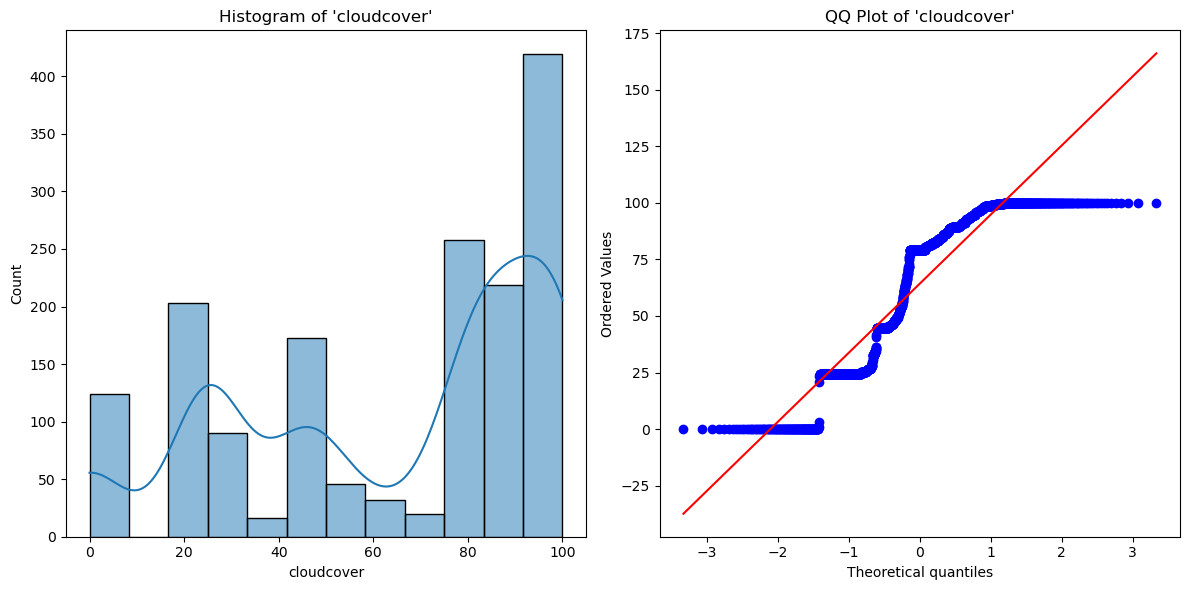

In [80]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

def test_normality(data, column):
    """
    对指定的DataFrame列进行正态性检验。
    :param data: Pandas DataFrame
    :param column: 要检验的列名
    """
    # Shapiro-Wilk Test
    shapiro_test = stats.shapiro(data[column])
    print(f"Shapiro-Wilk Test for '{column}':\nStatistic: {shapiro_test[0]}, P-value: {shapiro_test[1]}\n")

    # 绘制直方图
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f"Histogram of '{column}'")

    # 绘制 QQ 图
    plt.subplot(1, 2, 2)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f"QQ Plot of '{column}'")

    plt.tight_layout()
    plt.show()

# 示例：创建一个DataFrame
df = data

# 对DataFrame中的某一列进行正态性检验
test_normality(df, 'cloudcover')

/Users/max/anaconda3/envs/deeplearning/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


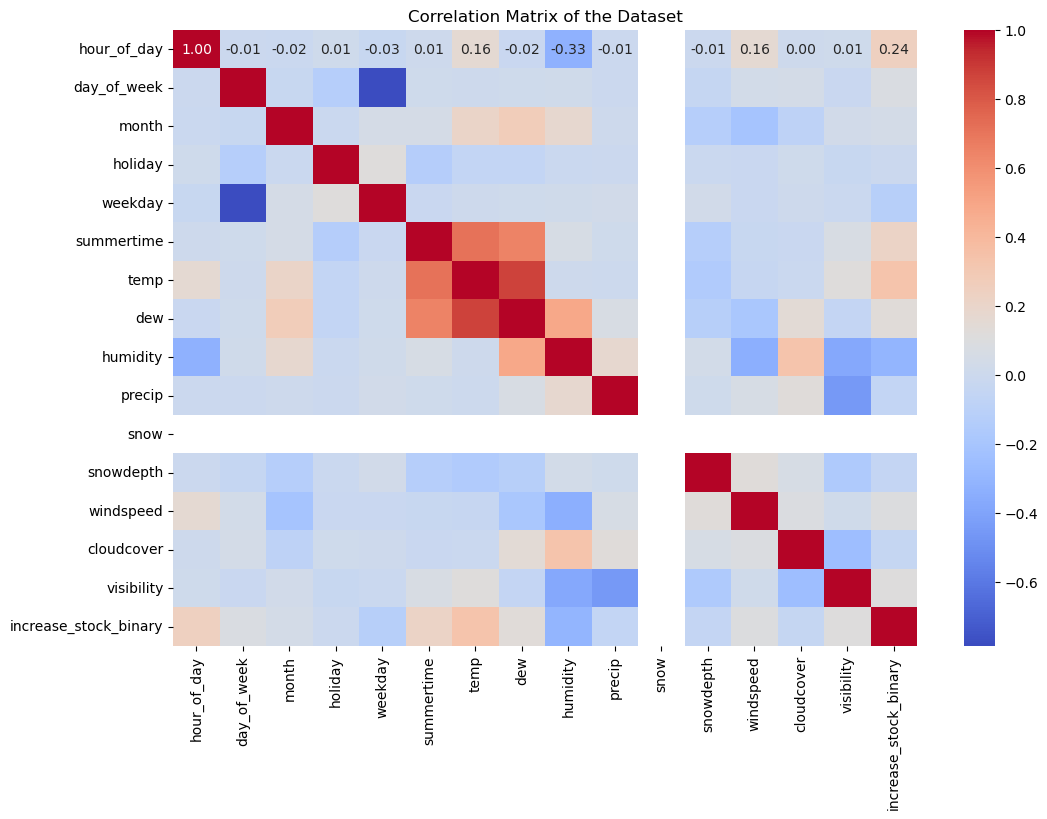

In [81]:
#相关性分析
# Computing the correlation matrix
corr_matrix = corrdata.corr()

# Generating a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of the Dataset')
plt.show()

In [82]:
# Calculating the correlation of each feature with the target variable
correlation_with_target = corr_matrix['increase_stock_binary'].sort_values(ascending=False)

# Removing the correlation of the target variable with itself
correlation_with_target = correlation_with_target.drop('increase_stock_binary')

# Displaying the sorted correlations
correlation_with_target

temp           0.336981
hour_of_day    0.240544
summertime     0.216052
dew            0.132663
visibility     0.113443
windspeed      0.096011
day_of_week    0.083688
month          0.037212
holiday       -0.004909
cloudcover    -0.045534
snowdepth     -0.047526
precip        -0.059304
weekday       -0.116446
humidity      -0.308726
snow                NaN
Name: increase_stock_binary, dtype: float64

In [83]:
#select feature
X = data[['temp','hour_of_day','summertime','dew','visibility','windspeed','humidity','weekday','precip','snowdepth']]
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

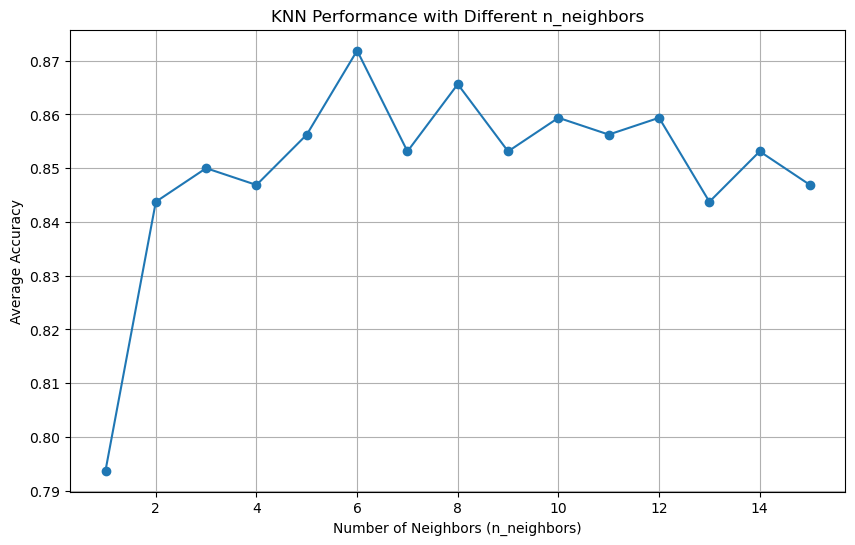

In [86]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating a KNN classifier
#knn = KNeighborsClassifier(n_neighbors=2)
#pipeline = make_pipeline(StandardScaler(), knn)
# Fitting the classifier to the training data
#knn.fit(X_train, y_train)

# Making predictions on the test data
#y_pred = knn.predict(X_test)
# 进行交叉验证
# cv参数代表交叉验证中的折数
#scores = cross_val_score(pipeline, X_test, y_test, cv=10)
# Generating a classification report and confusion matrix
#classification_report_result = classification_report(y_test, y_pred)
#confusion_matrix_result = confusion_matrix(y_test, y_pred)
#accuracy_score_data = accuracy_score(y_test,y_pred)
# Printing the results
#print("Classification Report:\n", classification_report_result)
#print("Confusion Matrix:\n", confusion_matrix_result)
#print("accuracy_score:\n",accuracy_score_data)
# Trying different values of n_neighbors
n_neighbors_values = range(1, 16)  # Testing values from 1 to 15
cross_val_scores = []

for n_neighbors in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    pipeline = make_pipeline(StandardScaler(), knn)
    scores = cross_val_score(pipeline, X_test, y_test, cv=10)
    cross_val_scores.append(np.mean(scores))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, cross_val_scores, marker='o')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Average Accuracy')
plt.title('KNN Performance with Different n_neighbors')
plt.grid(True)
plt.show()